In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import os
import umap
import matplotlib.pyplot as plt
import random as rnd
import itertools
import time

In [2]:
import distances
import linalg_tools as lt
import network_tools as nt

In [3]:
features = pd.read_csv('/Volumes/lucia_ext/bioprofiling/joel_data/features.csv')
labels = pd.read_csv('/Volumes/lucia_ext/bioprofiling/joel_data/labels.csv')

In [4]:
features.head()

,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0
0,DMSO_0,0.536562,12.487356,15.778500,24.338522,26.368895,24.041025,4.869900,4.391946,4.476412,...,8.317855,6.776128,6.255066,6.379255,6.257462,5.917157,5.897430,8.561354,9.569790,9.453573
1,DMSO_1,0.926005,13.042775,15.864564,25.510711,27.358829,23.517355,3.327665,5.950912,6.129566,...,6.649360,6.764805,5.908750,6.120350,6.509722,6.352012,6.267585,8.960855,9.907962,9.727644
2,DMSO_2,0.547070,13.195994,16.581769,24.039963,26.069198,24.341833,5.070974,4.349347,4.451659,...,7.334971,6.745958,6.098836,6.282019,5.622088,5.527961,5.353636,8.347267,9.519143,9.371809
3,DMSO_3,0.545389,13.521585,14.917854,24.048312,26.129603,24.503020,5.043355,4.287701,4.387205,...,6.980644,6.456373,5.630042,5.871957,6.138280,6.234191,6.042725,8.283984,9.668199,9.441025
4,DMSO_4,0.568507,13.291756,16.266199,24.435251,26.707209,24.846759,4.542844,4.458894,4.544696,...,9.398771,7.195676,6.709619,6.758405,6.580967,6.254454,6.125311,9.664669,10.661920,10.458926


In [5]:
labels.head()

,0,1,CID,MeSH
0,BRD-A00100033-001-04-8,nifurtimox,6842999,NaN
1,BRD-A00100033-001-04-8,nifurtimox,6842999,NaN
2,BRD-A00100033-001-04-8,nifurtimox,6842999,NaN
3,BRD-A00100033-001-04-8,nifurtimox,6842999,NaN
4,BRD-A00100033-001-04-8,nifurtimox,6842999,NaN


Remove NaN's to have less nodes

In [6]:
idx_to_drop = list(labels.loc[pd.isna(labels["MeSH"]), :].index)
features_nonan = features.drop(idx_to_drop, axis=0)
labels_nonan = labels.drop(idx_to_drop, axis=0)

In [7]:
rndstate = np.random.RandomState()
datamap_dl = umap.umap_.fuzzy_simplicial_set(features_nonan.values[:,1:], 15, rndstate, "euclidean")
graph_dl = nx.from_scipy_sparse_matrix(datamap_dl[0], create_using = nx.Graph)

In [13]:
labels_list = [l[3] for l in labels_nonan.values.tolist()]
nodes = list(range(len(graph_dl)))
labels_dict = dict(zip(nodes, labels_list))
nx.set_node_attributes(graph_dl, labels_dict, 'labels')

In [14]:
nx.get_node_attributes(graph_dl, 'labels')[100]

'Membrane Transport Modulators'

In [15]:
labels_list

['Theophylline',
 'Theophylline',
 'Theophylline',
 'Theophylline',
 'Theophylline',
 'Theophylline',
 'Theophylline',
 'Theophylline',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-Antagonists',
 'Adrenergic beta-2 Receptor Agonists',
 'Adrenergic beta-2 Receptor Agonists',
 'Adrenergic beta-2 Receptor Agonists',
 'Adrenergic beta-2 Receptor Agonists',
 'Adrenergic beta-2 Receptor Agonists',
 'Adrenergic beta-2 Receptor Agonists',
 'Adrenergic beta-2 Receptor Agonists',
 'Adrenergic beta-2 Receptor Agonists',
 'Adrenergic alpha-Antagonists',
 'Adrenergic alpha-Antagonists',
 'Adrenergic alpha-Antagonists',
 'Adrenergic alpha-Antagonists',
 'Adrenergic alpha-Antagonis

### Have a look at network

In [32]:
nx.number_of_nodes(graph_dl)

5807

In [33]:
nx.number_of_edges(graph_dl)

64411

In [34]:
nx.density(graph_dl)

0.003820860482861236

In [35]:
nx.average_clustering(graph_dl)

0.36255269562725567

In [36]:
nt.avg_deg(graph_dl)

22.183915963492336

-3.6920007708249987

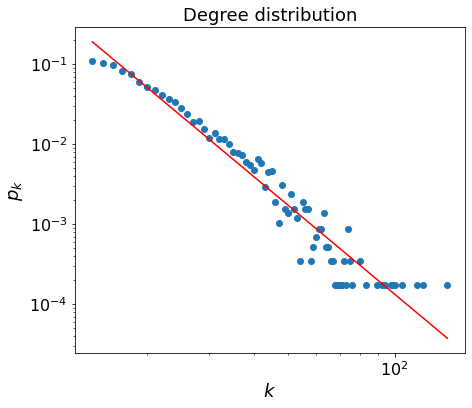

In [37]:
paras = nt.fitting(graph_dl, plot=True)
paras[0]

In [43]:
max(list(d for n, d in graph_dl.degree()))

141

In [39]:
nx.number_connected_components(graph_dl)

2

In [17]:
#nx.diameter(graph_dl)

In [18]:
A = np.matrix(nx.adjacency_matrix(graph_dl).todense())
A_new = A.copy()
A_new[A_new > 0] = 1
A4 = np.linalg.matrix_power(A_new, 4)
idx = np.where(A4==1)

In [19]:
idx

(array([   0,    0,    0, ..., 5806, 5806, 5806]),
 array([  28,   29,   31, ..., 5749, 5753, 5758]))

### Visualize network

In [16]:
pos_spring = nx.spring_layout(graph_dl)
pos_spectr = nx.spectral_layout(graph_dl)
d = dict(graph_dl.degree)

In [27]:
from matplotlib import cm

dict_keys = list(set(labels_list))
viridis = cm.get_cmap('viridis', len(dict_keys))
dict_values = [viridis(n) for n in np.linspace(0, 1, len(dict_keys))]
colors = {dict_keys[i]:dict_values[i] for i in range(len(dict_keys))}

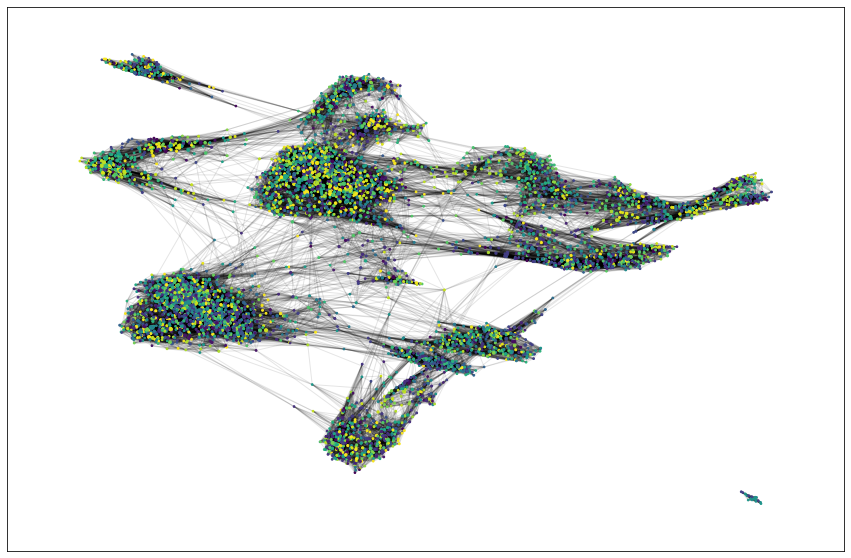

In [31]:
fig = plt.figure(figsize=(15, 10))


nx.draw_networkx_edges(graph_dl, pos=pos_spring, alpha=0.1)
nx.draw_networkx_nodes(graph_dl, pos=pos_spring, node_size=[v/5 for v in d.values()], 
                       node_color=[colors[node[1]['labels']] for node in graph_dl.nodes(data=True)])
plt.show()

Loan said in email: "ND: normal donors = healthy, ARPC1B: patients without the ARPC1B protein, WAS: patients without the WASP protein. Rows for each deficiency should be more similar than rows from different deficiencies. **We can also safely assume that ARPC1B and WAS should be a bit closer to each other than to ND rows**.", which does not seem to be the case looking at the plot above, but maybe the one below a little bit?

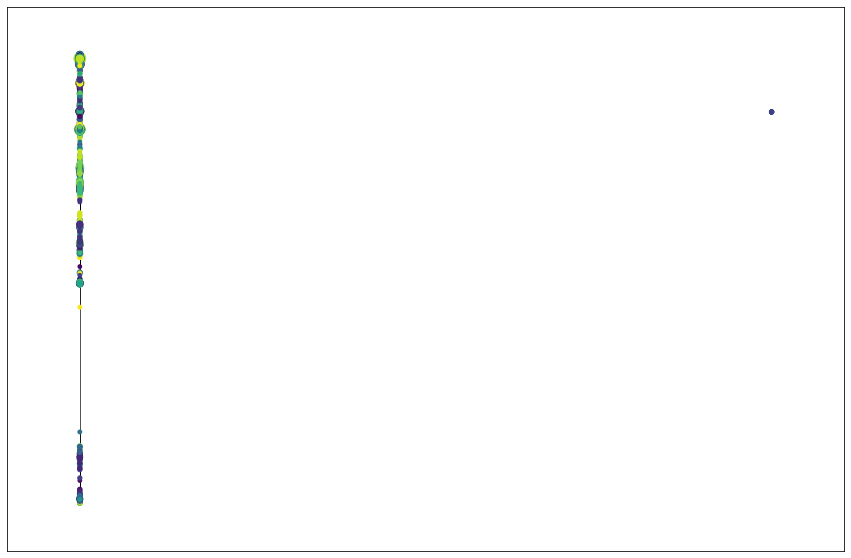

In [29]:
fig = plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(graph_dl, pos=pos_spectr, alpha=0.1)
nx.draw_networkx_nodes(graph_dl, pos=pos_spectr, node_size=[v for v in d.values()], 
                       node_color=[colors[node[1]['labels']] for node in graph_dl.nodes(data=True)])
plt.show()

### RW distance 1 - example

In [ ]:
node1 = 0
node2 = 28

In [ ]:
spl = nx.shortest_path_length(graph_dl, node1, node2)
print('shortest path length: ', spl)
if spl > 1:
    print('expected rw distance: ', distances.expected_rw_distance(graph_dl, node1, node2))
    graph_dl.add_edges_from([(node1, node2)])
    print('added edge')
    print('expected rw distance with edge: ', distances.expected_rw_distance(graph_dl, node1, node2))
    graph_dl.remove_edges_from([(node1, node2)])  

I find it very weird that the expected rw distance is shorter than the shortest path length, that cannot be right?

I guess that the expected rw distance is just some distance, not really the number of steps needed maybe?

### RW distance 2 - example

In [ ]:
large_number = 100
theta = 4
spl = nx.shortest_path_length(graph_dl, node1, node2)
print('shortest path length: ', spl)
if spl > 1:
    print('expected rw distance: ', distances.diss_distance(node1, node2, theta, graph_dl, large_number))
    graph_dl.add_edges_from([(node1, node2)])
    print('added edge')
    print('expected rw distance with edge: ', distances.diss_distance(node1, node2, theta, graph_dl, large_number))
    graph_dl.remove_edges_from([(node1, node2)]) 